In [93]:
import pandas as pd
import pymysql.cursors
from sqlalchemy import create_engine
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import matplotlib.pyplot as plt

%matplotlib inline
sns.set_style('darkgrid')
engine = create_engine('sqlite://', echo=False)


In [94]:
# Connect to the database
connection = pymysql.connect(host='localhost',
                             user='root',
                             password='achintya',
                             db='503project',
                             charset='utf8mb4',
                             cursorclass=pymysql.cursors.DictCursor)
df7 = pd.read_sql('SELECT lgID, COUNT(*) AS `num` FROM basketball_players GROUP BY lgID;', con=connection)
df7

# LEARNING THE DATASET



,lgID,num
0,NBA,20357
1,ABA,1463
2,NBL,1423
3,PBLA,165
4,NPBL,138
5,ABL1,205


In [95]:
connection = pymysql.connect(host='localhost',
                             user='root',
                             password='achintya',
                             db='503project',
                             charset='utf8mb4',
                             cursorclass=pymysql.cursors.DictCursor)
df7 = pd.read_sql('(Select * From basketball_awards_players as bap inner join (SELECT *  FROM basketball_players WHERE lgID= "NBA") as nbaonly on bap.playerID=nbaonly.playerID);', con=connection)
df = pd.DataFrame(df7)

#UNCOMMENT THE NEXT LINE TO SEE ALL NBA INFO 
#df7

In [96]:
# Making new table NBA_ONLY
df.to_sql('nba_only', con=engine)


In [97]:
#engine.execute("SELECT * FROM nba_only").fetchall()
#select sum(GP),sum(GS),sum(minutes),sum(points),sum(oRebounds),sum(dRebounds),sum(rebounds),sum(assists),sum(steals),sum(blocks),sum(turnovers),sum(PF), sum(fgAttempted),sum(fgMade),sum(ftAttempted),sum(ftMade),sum(threeAttempted),sum(threeMade),sum(PostGP),sum(PostGS),sum(PostMinutes),sum(PostPoints), sum(PostoRebounds),sum(PostdRebounds),sum(PostRebounds),sum(PostAssists),sum(PostSteals),sum(PostBlocks),sum(PostTurnovers) ,sum(PostPF),sum(PostfgAttempted), sum(PostfgMade),sum(PostftAttempted),sum(PostftMade),sum(PostthreeAttempted),sum(PostthreeMade) from basketball_players group by playyear;

In [98]:
connection = pymysql.connect(host='localhost',
                             user='root',
                             password='achintya',
                             db='503project',
                             charset='utf8mb4',
                             cursorclass=pymysql.cursors.DictCursor)
df7 = pd.read_sql('select playyear,sum(GP),sum(GS),sum(minutes),sum(points),sum(oRebounds),sum(dRebounds),sum(rebounds),sum(assists),sum(steals),sum(blocks),sum(turnovers),sum(PF), sum(fgAttempted),sum(fgMade),sum(ftAttempted),sum(ftMade),sum(threeAttempted),sum(threeMade),sum(PostGP),sum(PostGS),sum(PostMinutes),sum(PostPoints), sum(PostoRebounds),sum(PostdRebounds),sum(PostRebounds),sum(PostAssists),sum(PostSteals),sum(PostBlocks),sum(PostTurnovers) ,sum(PostPF),sum(PostfgAttempted), sum(PostfgMade),sum(PostftAttempted),sum(PostftMade),sum(PostthreeAttempted),sum(PostthreeMade) from basketball_players group by playyear;', con=connection)
df_james = pd.DataFrame(df7)
stats = df_james.columns[3:]
yearStats = df_james.groupby('playyear')[stats].sum() 
#UNCOMMENT THE NEXT LINEs TO SEE dataframe 
#df_james
#stats
#yearStats.head(10)



In [99]:
stats = df_james.columns[3:] 

In [100]:
yearStats = df_james.groupby('playyear')[stats].sum()

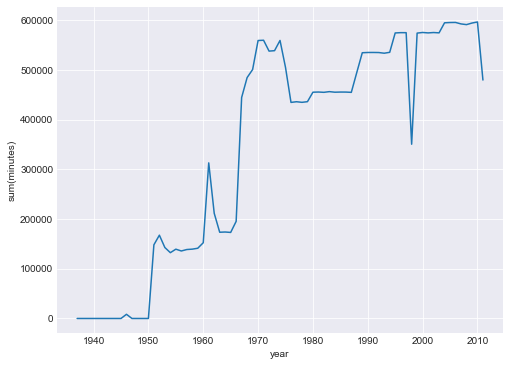

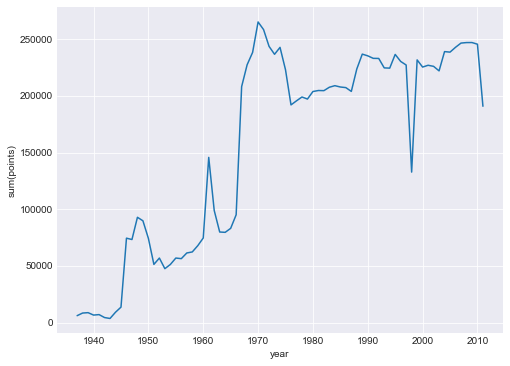

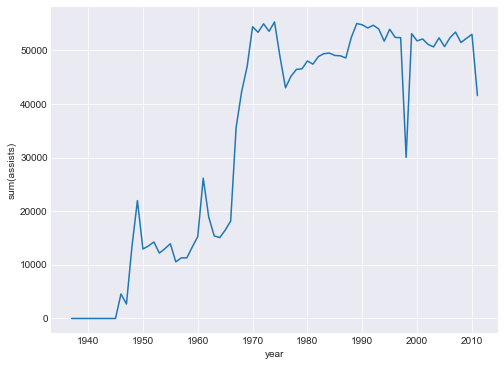

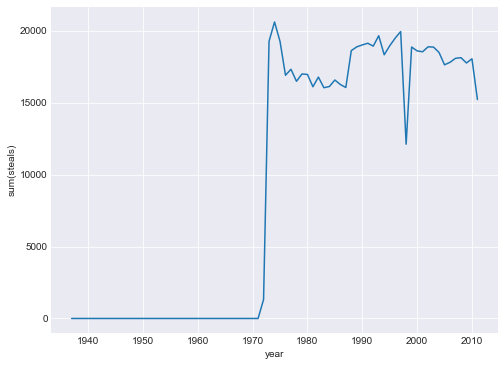

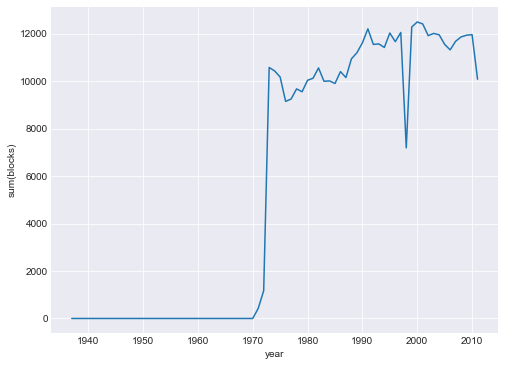

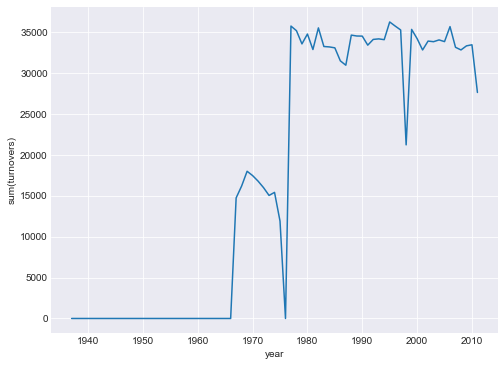

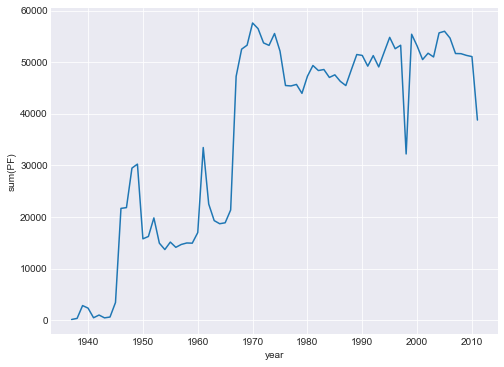

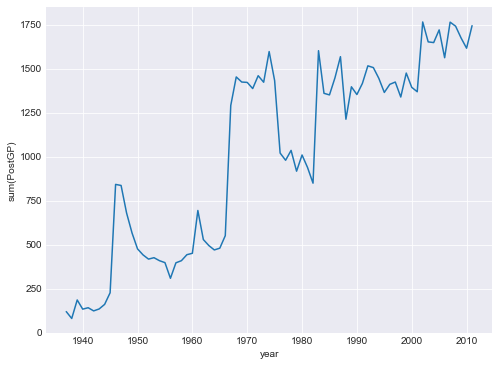

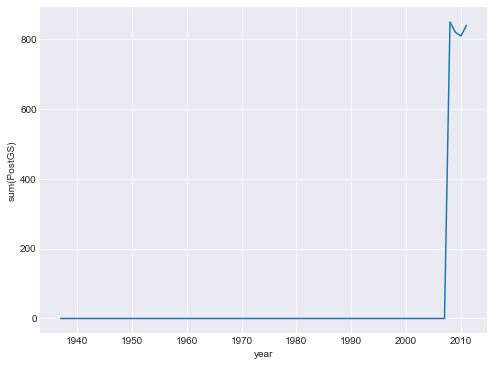

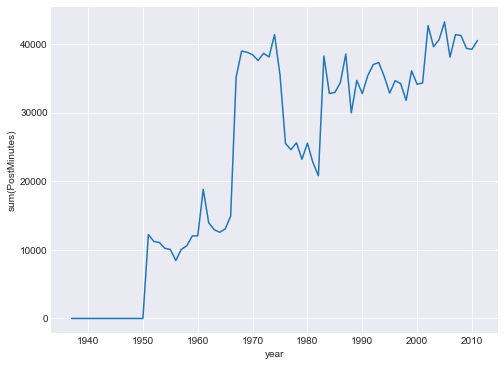

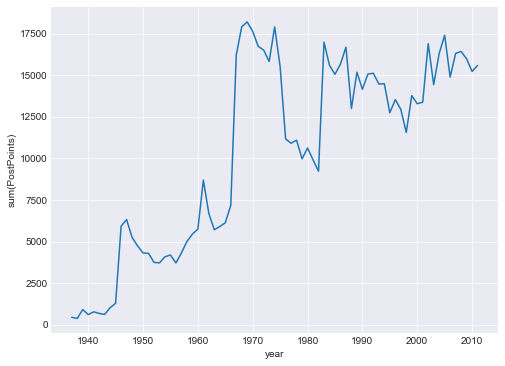

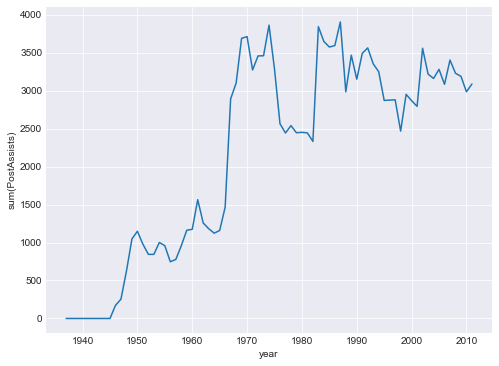

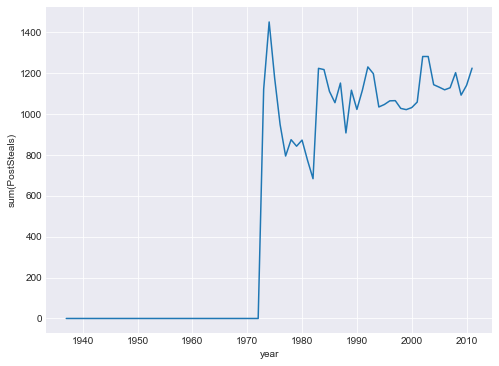

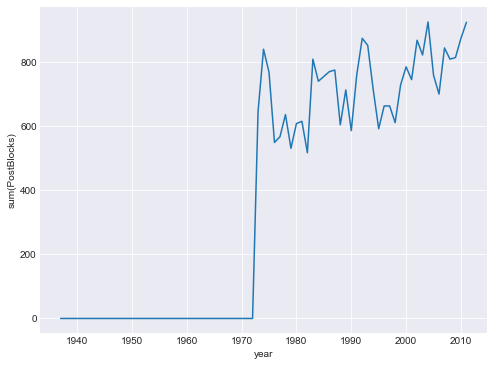

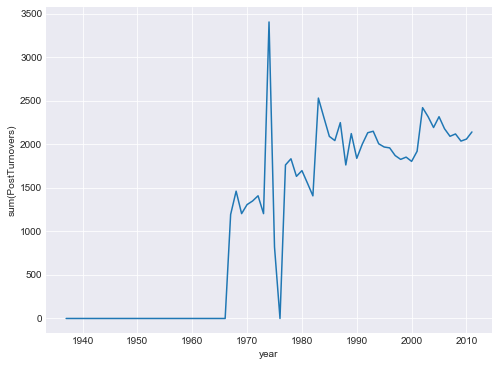

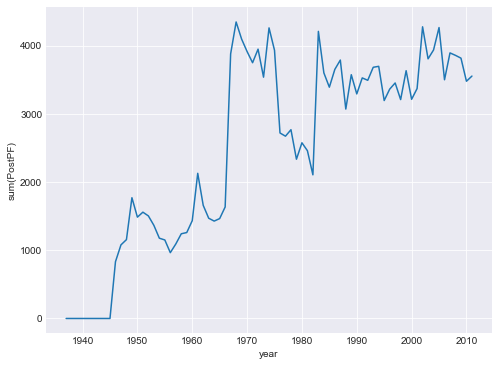

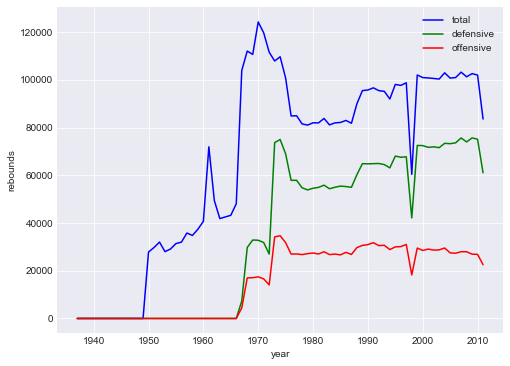

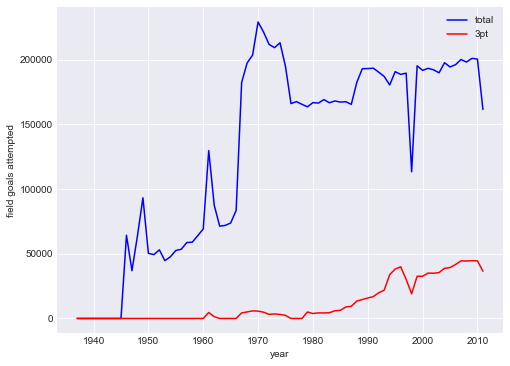

In [101]:
def plot_stats_by_year(statistic):
    fig, ax = plt.subplots(figsize = (8,6))
    ax.plot(yearStats.index, yearStats[statistic])
    ax.set_xlabel('year')
    ax.set_ylabel(statistic)
    plt.show()

# plot all stats over the years
for s in stats:
    if 'rebounds' in s.lower():
        continue    # ignore rebounds (see below)
    elif 'Attempted' in s:
        continue    # ignore fg, ft, three attempts (see below)
    elif 'Made' in s:
        continue    # ignore fg, ft, three made (see below)
    else:
        plot_stats_by_year(s)

# plot rebounds over the years
fig, ax = plt.subplots(figsize = (8,6))
ax.plot(yearStats.index, yearStats['sum(rebounds)'], color = 'blue', label = 'total')
ax.plot(yearStats.index, yearStats['sum(dRebounds)'], color = 'green', label = 'defensive')
ax.plot(yearStats.index, yearStats['sum(oRebounds)'], color = 'red', label = 'offensive')
ax.set_xlabel('year')
ax.set_ylabel('rebounds')
plt.legend()
plt.show()

# plot field goal and three point attempts over the years
fig, ax = plt.subplots(figsize = (8,6))
ax.plot(yearStats.index, yearStats['sum(fgAttempted)'], color = 'blue', label = 'total')
ax.plot(yearStats.index, yearStats['sum(threeAttempted)'], color = 'red', label = '3pt')
ax.set_xlabel('year')
ax.set_ylabel('field goals attempted')
plt.legend()
plt.show()


def plot_pg_stat(s1, s2, annualMean = False, regLine = False, logx = False, logy = False, alpha = 0.2):
    # annualMean specifies if the avg stat per year will be added to the plot
    # regLIne specifies if a linear regression line is to be plotted
    # logx and logy specify if whether or not to take the log of those variables
    # alpha = 0.2 makes the dense scatterplots easier to see, can be altered
    temp = pd.DataFrame(playersPG[[s1, s2]])
    if logx:
        temp[s1] = np.log(temp[s1])
    if logy:
        temp[s2] = np.log(temp[s2])
    fig, ax = plt.subplots(figsize = (8,6))
    if regLine:
        sns.regplot(s1, s2, data = temp, ci = None, color = '#ff7f00', scatter_kws = {'alpha': alpha, 'color': 'blue'})
    else:
        ax.scatter(temp[s1], temp[s2], alpha = alpha, color = 'blue')
    if s1 == 'year' and annualMean:
        ax.plot(sorted(temp[s1].unique()), temp.groupby(s1)[s2].mean(), color = 'red')
    if logx:
        ax.set_xlabel('log (' + s1 + ')', fontsize = 25)
    elif s1 == 'year':
        ax.set_xlabel(s1, fontsize = 16)
    elif s1 == 'GP':
        ax.set_xlabel('games played', fontsize = 16)
    elif 'Pct' in s1:
        ax.set_xlabel(s1, fontsize = 16)
    else:
        ax.set_xlabel(s1 + ' per game', fontsize = 16)
    if logy:
        ax.set_ylabel('log (' + s2 + ')', fontsize = 16)
    elif 'Pct' in s2:
        ax.set_ylabel(s2, fontsize = 16)
    else:
        ax.set_ylabel(s2 + ' per game', fontsize = 16)
    plt.show()
    

In [123]:
connection = pymysql.connect(host='localhost',
                             user='root',
                             password='achintya',
                             db='503project',
                             charset='utf8mb4',
                             cursorclass=pymysql.cursors.DictCursor)
df1 = pd.read_sql('select playyear, sum(GP),count(playerID) from basketball_players group by playyear;', con=connection)
df_james_2 = pd.DataFrame(df1)
#df_james_2

In [124]:
players = df_james_2[df_james_2['playyear'].isin(yearStats.index)]
#players

In [125]:
# determining total number of games played each year, bar plot
totalGames = players.groupby('playyear')['sum(GP)'].max()
#print(totalGames[totalGames != totalGames.max()])
fig, ax = plt.subplots(figsize = (8,6))
sns.barplot(totalGames.index, totalGames, color = '#756bb1')
ax.set_ylabel('games played')
ax.set_xticklabels(totalGames.index, rotation = 'vertical')
plt.show()

In [126]:
# determining total number of games played each year, bar plot
totalGames = players.groupby('playyear')['count(playerID)'].max()
#print(totalGames[totalGames != totalGames.max()])
fig, ax = plt.subplots(figsize = (8,6))
sns.barplot(totalGames.index, totalGames, color = 'red')
ax.set_ylabel('games played')
ax.set_xticklabels(totalGames.index, rotation = 'vertical')
plt.show()

In [51]:
connection = pymysql.connect(host='localhost',
                             user='root',
                             password='achintya',
                             db='503project',
                             charset='utf8mb4',
                             cursorclass=pymysql.cursors.DictCursor)
df2 = pd.read_sql('select b.firstName, b.lastName, pp.avgg from (select playerID,a.points/a.gp as avgg from (select playerID ,avg(GP) as gp,avg(points) as points from basketball_players group by playerID )as a ) as pp inner join basketball_master as b on pp.playerID=b.bioID order by pp.avgg desc limit 10;', con=connection)
df_james_3 = pd.DataFrame(df2)
df_james_3

/Users/achintyapillai/anaconda3/lib/python3.6/site-packages/pymysql/cursors.py:329: Warning: (1365, 'Division by 0')
  self._do_get_result()


,firstName,lastName,avgg
0,Michael,Conley,30.224215
1,Michael,Jordan,30.123120
2,Wilton,Chamberlain,30.066014
3,LeBron,James,27.641493
4,Elgin,Baylor,27.362871
5,Jerry,West,27.030055
6,Allen,Iverson,26.660835
7,Robert,Pettit,26.363636
8,Kevin,Durant,26.263158
9,Oscar,Robertson,25.682697


In [127]:
connection = pymysql.connect(host='localhost',
                             user='root',
                             password='achintya',
                             db='503project',
                             charset='utf8mb4',
                             cursorclass=pymysql.cursors.DictCursor)
df5 = pd.read_sql('Select a.avgppt, count(*) as c From (select round(sum(points)/sum(GP))as avgppt from basketball_players group by playerID) as a group by a.avgppt order by a.avgppt desc limit 30;', con=connection)
df_james_4 = pd.DataFrame(df5)
#df_james_4

/Users/achintyapillai/anaconda3/lib/python3.6/site-packages/pymysql/cursors.py:329: Warning: (1365, 'Division by 0')
  self._do_get_result()


In [128]:
%pylab
import pandas as pd
df = pd.DataFrame({'Avg Points/Game':df_james_4['avgppt'], 'Number of Players':df_james_4['c']})

ax = df.plot.bar(x='Avg Points/Game', y='Number of Players', rot=-10000)
figsize(15, 5)

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [129]:
connection = pymysql.connect(host='localhost',
                             user='root',
                             password='achintya',
                             db='503project',
                             charset='utf8mb4',
                             cursorclass=pymysql.cursors.DictCursor)
df5 = pd.read_sql('Select a.avgreb, count(*) as c From (select round(sum(rebounds)/sum(GP))as avgreb from basketball_players group by playerID) as a group by a.avgreb order by a.avgreb desc limit 20;', con=connection)
df_james_5 = pd.DataFrame(df5)
#df_james_5

/Users/achintyapillai/anaconda3/lib/python3.6/site-packages/pymysql/cursors.py:329: Warning: (1365, 'Division by 0')
  self._do_get_result()


In [130]:
%pylab
import pandas as pd
df = pd.DataFrame({'Avg Reb/Game':df_james_5['avgreb'], 'Number of Players':df_james_5['c']})

ax = df.plot.bar(x='Avg Reb/Game', y='Number of Players', rot=-10000)
figsize(15, 5)

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [131]:
connection = pymysql.connect(host='localhost',
                             user='root',
                             password='achintya',
                             db='503project',
                             charset='utf8mb4',
                             cursorclass=pymysql.cursors.DictCursor)
df6 = pd.read_sql('Select a.avgass as avgass, count(*) as c From (select round(sum(assists)/sum(GP))as avgass from basketball_players group by playerID) as a group by a.avgass order by a.avgass desc limit 7;', con=connection)
df_james_6 = pd.DataFrame(df6)
#df_james_6

/Users/achintyapillai/anaconda3/lib/python3.6/site-packages/pymysql/cursors.py:329: Warning: (1365, 'Division by 0')
  self._do_get_result()


In [132]:
%pylab
import pandas as pd
df = pd.DataFrame({'Avg Assist/Game':df_james_6['avgass'], 'Number of Players':df_james_6['c']})

ax = df.plot.bar(x='Avg Assist/Game', y='Number of Players', rot=0)
figsize(15, 5)

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [133]:
connection = pymysql.connect(host='localhost',
                             user='root',
                             password='achintya',
                             db='503project',
                             charset='utf8mb4',
                             cursorclass=pymysql.cursors.DictCursor)
df8 = pd.read_sql('Select a.avgstl as avgs, count(*) as c From (select round(sum(steals)/sum(GP))as avgstl from basketball_players group by playerID) as a group by a.avgstl order by a.avgstl desc limit 5;', con=connection)
df_james_8 = pd.DataFrame(df8)
#df_james_8

/Users/achintyapillai/anaconda3/lib/python3.6/site-packages/pymysql/cursors.py:329: Warning: (1365, 'Division by 0')
  self._do_get_result()


In [134]:
%pylab
import pandas as pd
df = pd.DataFrame({'Avg Steals/Game':df_james_8['avgs'], 'Number of Players':df_james_8['c']})

ax = df.plot.bar(x='Avg Steals/Game', y='Number of Players', rot=0)
figsize(15, 5)

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [135]:
connection = pymysql.connect(host='localhost',
                             user='root',
                             password='achintya',
                             db='503project',
                             charset='utf8mb4',
                             cursorclass=pymysql.cursors.DictCursor)
df9 = pd.read_sql('Select a.avgblk as avgb, count(*) as c From (select round(sum(blocks)/sum(GP))as avgblk from basketball_players group by playerID) as a group by a.avgblk order by a.avgblk desc limit 5;', con=connection)
df_james_9 = pd.DataFrame(df9)
#df_james_9

/Users/achintyapillai/anaconda3/lib/python3.6/site-packages/pymysql/cursors.py:329: Warning: (1365, 'Division by 0')
  self._do_get_result()


In [136]:
%pylab
import pandas as pd
df = pd.DataFrame({'Avg Block/Game':df_james_9['avgb'], 'Number of Players':df_james_9['c']})

ax = df.plot.bar(x='Avg Block/Game', y='Number of Players', rot=0)
figsize(15, 5)

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [137]:
connection = pymysql.connect(host='localhost',
                             user='root',
                             password='achintya',
                             db='503project',
                             charset='utf8mb4',
                             cursorclass=pymysql.cursors.DictCursor)
df10 = pd.read_sql('select * from (select log(avg(points)) as logavgppt,log(sum(minutes)/sum(gp)) as logmpg from basketball_players group by playerID) as a where a.logavgppt is not null and logmpg is not null;', con=connection)
df_james_10 = pd.DataFrame(df10)
#df_james_10

/Users/achintyapillai/anaconda3/lib/python3.6/site-packages/pymysql/cursors.py:329: Warning: (3020, 'Invalid argument for logarithm')
  self._do_get_result()
/Users/achintyapillai/anaconda3/lib/python3.6/site-packages/pymysql/cursors.py:329: Warning: (1365, 'Division by 0')
  self._do_get_result()


In [138]:
s1= 'logavgppt'
s2= 'logmpg'
regLine = True
alpha = 0.2
temp = pd.DataFrame(df_james_10[[s1, s2]])
temp
fig, ax = plt.subplots(figsize = (8,6))
ax.scatter(temp[s1], temp[s2], alpha = alpha, color = 'red')
ax.set_xlabel('log/min', fontsize = 16)
ax.set_ylabel('log points', fontsize = 16)
#ax.plot(sorted(temp[s1].unique()), temp.groupby(s1)[s2].mean(), color = 'red')


Text(0,0.5,'log points')

In [139]:
connection = pymysql.connect(host='localhost',
                             user='root',
                             password='achintya',
                             db='503project',
                             charset='utf8mb4',
                             cursorclass=pymysql.cursors.DictCursor)
df11 = pd.read_sql('select * from (select sum(assists)/sum(GP) as apg ,sum(turnovers)/sum(GP) as tpg from basketball_players group by playerID) as a where a.apg is not null and a.tpg is not null;', con=connection)
df_james_11 = pd.DataFrame(df11)
#df_james_11

/Users/achintyapillai/anaconda3/lib/python3.6/site-packages/pymysql/cursors.py:329: Warning: (1365, 'Division by 0')
  self._do_get_result()


In [140]:
s2= 'apg'
s1= 'tpg'
regLine = True
alpha = 0.2
temp = pd.DataFrame(df_james_11[[s1, s2]])
temp
fig, ax = plt.subplots(figsize = (8,6))
ax.scatter(temp[s1], temp[s2], alpha = alpha, color = 'blue')
ax.set_xlabel('turn over per game', fontsize = 16)
ax.set_ylabel('assist per game', fontsize = 16)
#ax.plot(sorted(temp[s1].unique()), temp.groupby(s1)[s2].mean(), color = 'red')

Text(0,0.5,'assist per game')

In [116]:
connection = pymysql.connect(host='localhost',
                             user='root',
                             password='achintya',
                             db='503project',
                             charset='utf8mb4',
                             cursorclass=pymysql.cursors.DictCursor)
df12 = pd.read_sql('select * from (select sum(points)/sum(GP)as avgppt,sum(minutes)/sum(gp) as mpg from basketball_players group by playerID) as a where a.avgppt is not null and a.mpg is not null;', con=connection)
df_james_12 = pd.DataFrame(df12)
#df_james_12

/Users/achintyapillai/anaconda3/lib/python3.6/site-packages/pymysql/cursors.py:329: Warning: (1365, 'Division by 0')
  self._do_get_result()


In [141]:
s1= 'mpg'
s2= 'avgppt'
regLine = True
alpha = 0.2
temp = pd.DataFrame(df_james_12[[s1, s2]])
temp
fig, ax = plt.subplots(figsize = (8,6))
ax.scatter(temp[s1], temp[s2], alpha = alpha, color = 'blue')
ax.set_xlabel('mins per game', fontsize = 16)
ax.set_ylabel('Average Points', fontsize = 16)
#ax.plot(sorted(temp[s1].unique()), temp.groupby(s1)[s2].mean(), color = 'red'

Text(0,0.5,'Average Points')

In [142]:
connection = pymysql.connect(host='localhost',
                             user='root',
                             password='achintya',
                             db='503project',
                             charset='utf8mb4',
                             cursorclass=pymysql.cursors.DictCursor)
df13 = pd.read_sql('select * from (select sum(points)/sum(GP)as avgppt,(sum(fgMade)/sum(fgAttempted))*100 as fgp from basketball_players group by playerID) as a where a.avgppt is not null and a.fgp is not null;', con=connection)
df_james_13 = pd.DataFrame(df13)
#df_james_13

/Users/achintyapillai/anaconda3/lib/python3.6/site-packages/pymysql/cursors.py:329: Warning: (1365, 'Division by 0')
  self._do_get_result()


In [143]:
s1= 'fgp'
s2= 'avgppt'
regLine = True
alpha = 0.2
temp = pd.DataFrame(df_james_13[[s1, s2]])
temp
fig, ax = plt.subplots(figsize = (8,6))
ax.scatter(temp[s1], temp[s2], alpha = alpha, color = 'brown')
ax.set_xlabel('Field goal % ', fontsize = 16)
ax.set_ylabel('Points per game', fontsize = 16)
ax.set_ylim(0,35)
ax.set_xlim(0,100)
#ax.plot(sorted(temp[s1].unique()), temp.groupby(s1)[s2].mean(), color = 'red'

(0, 100)

In [144]:
connection = pymysql.connect(host='localhost',
                             user='root',
                             password='achintya',
                             db='503project',
                             charset='utf8mb4',
                             cursorclass=pymysql.cursors.DictCursor)
df14 = pd.read_sql('Select * From (select hsState,count(bioID) as num from basketball_master group by hsState order by num desc limit 11) as a Where num != (select Max(num) as max from (select hsState,count(bioID) as num from basketball_master group by hsState order by num desc limit 11) as b);', con=connection)
df_james_14 = pd.DataFrame(df14)
#df_james_14

In [145]:
df = pd.DataFrame({'School': [428,395,330,264,254,243,180,160,137,111],
                   'rad': df_james_14['num']
                   },
                   index=df_james_14['hsState'])
plot = df.plot.pie(x='rad',y='School', figsize=(10, 10))
